This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [21]:
imdb.load_data?

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [23]:
#연습
from tensorflow.keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [24]:
train_data.shape

(25000,)

In [25]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# positive : 1, negative : 0
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [7]:
# [(value, key) for (key, value) in word_index.items()] -> 이는 아래의 문장과 같은 유형
[i*2 for i in range(3)]

[0, 2, 4]

In [ ]:
#딕셔너리에서 (key, value) 순서였음
word_index

In [ ]:
#위의 딕셔너리를 reverse하여 (value, key) 순서로 바꿈
reverse_word_index

In [12]:
#join 함수 예시 1
" ".join(["a","b","c"])

'a b c'

In [27]:
#join 함수 예시 2
"-".join(["a","b","c"])

'a-b-c'

In [13]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [10]:
#train_data[0][:5]의 예시 데이터를 이용한 아래 코드 설명예시
reverse_word_index.get(1- 3, "?")
reverse_word_index.get(14- 3, "?")
reverse_word_index.get(22- 3, "?")
reverse_word_index.get(16- 3, "?")
reverse_word_index.get(43- 3, "?")


'just'

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [15]:
len(train_data[0])

218

In [16]:
len(train_data[1])

189

-> train_data의 첫 줄과 그 다음 줄의 길이가 다르므로 vectorize를 해서 same dimension을 만들어야해

In [17]:
train_data[0][:6]

[1, 14, 22, 16, 43, 530]

In [18]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#16,16,1은 모두 output layers의 수를 의미

In [29]:
#연습
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

**Compiling the model**

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [30]:
#연습
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validating your approach

**Setting aside a validation set**

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
#연습
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model (model.fit이용)**

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 50ms/step - loss: 0.5097 - accuracy: 0.7862 - val_loss: 0.3773 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2997 - accuracy: 0.9016 - val_loss: 0.3076 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2170 - accuracy: 0.9309 - val_loss: 0.2767 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1725 - accuracy: 0.9434 - val_loss: 0.2774 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1384 - accuracy: 0.9559 - val_loss: 0.3104 - val_accuracy: 0.8794
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1123 - accuracy: 0.9655 - val_loss: 0.3052 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0928 - accuracy: 0.9717 - val_loss: 0.3343 - val_accuracy: 0.8791
Epoch 8/20
30

In [36]:
#연습
#history = model.fit(partial_x_train,
 #                   partial_y_train,
 #                   epochs=20,
 #                  batch_size=512,
 #                   validation_data = (x_val, y_val))

In [38]:
#history를 딕셔너리화 하기
history_dict = history.history #이 코드 기억해두기
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

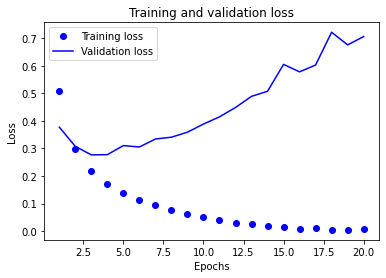

In [40]:
#visualization
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

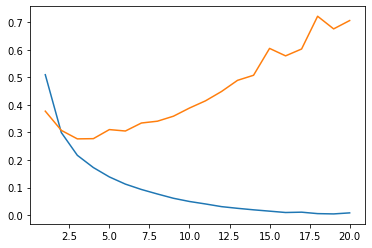

In [41]:
#연습
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)  #이 부분은 그냥 외우자. 잘 모르겠다.
plt.plot(epochs, loss_values,label='training loss')
plt.plot(epochs, val_loss_values, label='validation loss')

**Plotting the training and validation accuracy**

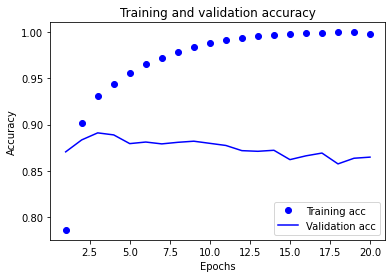

In [42]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [43]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4762 - accuracy: 0.8139
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2710 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2038 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3178 - accuracy: 0.8766


In [44]:
results

[0.3177587687969208, 0.8766000270843506]

### Using a trained model to generate predictions on new data

In [46]:
model.predict(x_test) #x_test는 test를 위한 new data이다

array([[0.22890665],
       [0.999995  ],
       [0.9761888 ],
       ...,
       [0.19466609],
       [0.13858162],
       [0.70774883]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [56]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [58]:
#연습
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [59]:
len(train_data)

8982

In [60]:
len(test_data)

2246

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [62]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [63]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [64]:
train_labels[10]

3

### Preparing the data (data encoding 함수 : vectorize_sequences)

**Encoding the input data (vectorize_sequences 함수)**

In [66]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [67]:
#연습
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [68]:
#모든 행의 length를 동일하게 맞춰줌
x_train.shape

(8982, 10000)

**Encoding the labels (to_one_hot 함수)**

In [48]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [50]:
#train_labels의 첫번째 토픽에 대한 label이 3이므로, train_labels에 to_one_hot함수를 적용한 후를 나타내는 y_train에 대하여, 
#첫번째 토픽에 대한 행을 불러왔더니
#index = 3에 대한 (label이 3이었으므로) 값이 1로 바뀌었음을 확인할 수 있다.

y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [55]:
#연습
#from tensorflow.keras import to_categorical

**결론 : to_one_hot 혹은 to_categorical 함수는 train_labels, test_labels을 인코딩하는 함수이고, vectorize_sequences 함수는 train_data, test_data를 인코딩하는 함수이다**

### Building your model

**Model definition**

In [69]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [70]:
#softmax함수를 이용하므로 loss함수를 "categorical_crossentropy" 이걸로 해야한다
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [72]:
#연습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating your approach

**Setting aside a validation set**

In [74]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [75]:
#연습
x_val = x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

**Training the model**

In [78]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

ValueError: ignored

In [76]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

ValueError: ignored

**Plotting the training and validation loss**

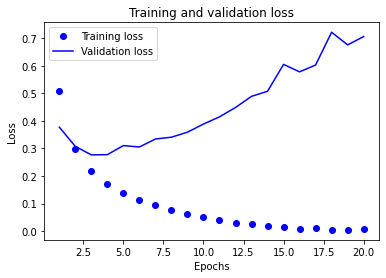

In [79]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

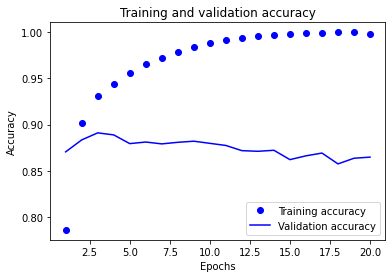

In [80]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [81]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

ValueError: ignored

In [82]:
results

[0.3177587687969208, 0.8766000270843506]

In [83]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1745325022261799

### Generating predictions on new data

In [84]:
predictions = model.predict(x_test)

In [85]:
predictions[0].shape

(46,)

In [86]:
predictions[0]

array([0.01997963, 0.0224356 , 0.01972396, 0.0208687 , 0.0207989 ,
       0.02248763, 0.01948828, 0.02398876, 0.01983156, 0.02377791,
       0.02285112, 0.02034718, 0.02017528, 0.02144344, 0.02194088,
       0.0206108 , 0.02226232, 0.0211199 , 0.0214876 , 0.02067215,
       0.02060695, 0.02360666, 0.02222554, 0.02103697, 0.0233455 ,
       0.0215565 , 0.02165801, 0.02160737, 0.02262011, 0.02128677,
       0.02198778, 0.02217413, 0.02343027, 0.02406367, 0.0211808 ,
       0.02224391, 0.02218972, 0.02139129, 0.02006045, 0.02411955,
       0.02032135, 0.02187392, 0.02037775, 0.02320617, 0.02055102,
       0.02498619], dtype=float32)

In [88]:
#model이 softmax함수를 이용하였기 때문에
np.sum(predictions[0])

1.0

In [89]:
np.argmax(predictions[0])

45

### A different way to handle the labels and the loss

In [90]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [92]:
#loss함수를 sparse_categorical_crossentropy로 하기
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [93]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

ValueError: ignored

Accuracy가 이전의 80%에 비해 꽤 많이 떨어졌는데, 이는 중간에 layer=4 밖에 되지 않는 것을 사용했기 때문이다. 결론적으로, having sufficiently large intermediate layer의 중요성을 보여주는 예시이다.

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [94]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [95]:
train_data.shape

(404, 13)

In [96]:
test_data.shape

(102, 13)

In [97]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [102]:
mean = train_data.mean(axis=0)
#train_data 표준화
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
#test_data 표준화
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [103]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [105]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}") #이건 그냥 저 아래 processing fold라는 글자를 출력하기 위한 것
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [107]:
all_scores

[1.9050525426864624, 2.7001492977142334, 2.480567216873169, 2.4750025272369385]

In [108]:
np.mean(all_scores)

2.390192896127701

**Saving the validation logs at each fold**

In [109]:
num_epochs = 500
all_mae_histories = [] #validation 기록을 저장하기 위한 빈 리스트 지정
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"] #history.history는 딕셔너리. key에'val_mae'를 넣어 value값 출력하기
    all_mae_histories.append(mae_history) #위에서 출력된 value값을 빈리스트에 차곡차곡 쌓기

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [111]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [112]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [114]:
#위와 같은 코드 내가 다시 한 번 내 방식대로 쓴 것
average_mae_history=[]
for x in all_mae_histories:
    for i in range(num_epochs):
        y = np.mean(x[i])
        average_mae_history.append(y)
                       

**Plotting validation scores**

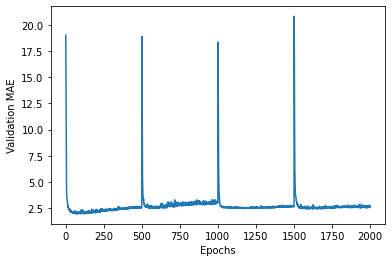

In [115]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

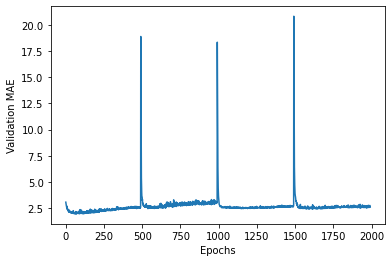

In [116]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [117]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 16.9316 - mae: 2.7262


In [118]:
test_mae_score

2.726202964782715

### Generating predictions on new data

In [119]:
predictions = model.predict(test_data)
predictions[0]

array([8.946145], dtype=float32)

In [120]:
#our prediction is 8.83 (comparing to test_targets)
test_targets[0]

7.2

### Wrapping up

## Summary